## Aim :
To analyse and visualise correlations of the generated clusters using different distance parameters.

To find the most accurate method of generating clusters within a shorter time period.


Inorder to form clusters, we need to find 2 centroids in the vector space which will be used to split it into 2 parts.
The process of calculating the distance can be done by 2 methods:

 - Euclidean distance : This distance is calculate for the vectors in the vector space, by using the Euclidean distance formula.
 - Cosine distance : Similar to Eucldean distance, but uses Cosine distance formula.
 

Also 2 different types of trees while forming clusters.
 
 - Tree distance : The total no. of hops between the two leaf nodes, here the distance between the two adjacent node is always 1.
 - Weighted tree : The weight of hops b/w each node is the distance between the centroids in the cluster by 2.

### Example for Tree and Weighted tree

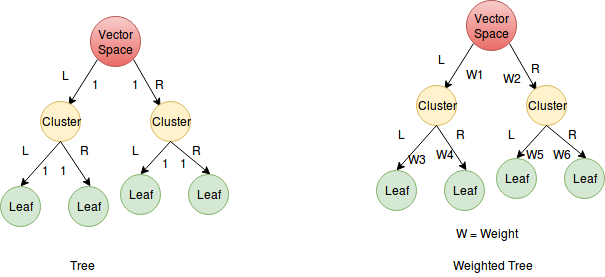

In [10]:
from IPython.display import Image
Image(filename='tree(1).png') 


### Correlation for 100 clusters generated using random centroids:

- In the given vector space of 64 words, we choose 2 random centroids, based on those centroids we are generating clusters.

- The below charts describe the relation between  
    - correlation b/w the euclidean and tree distance
    - correlation b/w euclidean and weighted tree distance
    - correlation b/w cosine and tree distance
    - correlation b/w cosine and weighted tree distance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='AnjaliRao', api_key='dDrA7YHd67Dyg0rf5fW1')
import plotly.graph_objs as go


In [3]:
def lineplot(filename ,c1,c2,c3,c4) :
    
    data = pd.read_csv(filename)

    column1 = data.iloc[:,c1]
    column2 = data.iloc[:,c2]
    column3 = data.iloc[:,c3]
    column4 = data.iloc[:,c4]


    trace1 = go.Scatter(
            x = range(1,100),
            y = column1 ,
            name = 'correlation_between_euclidean_tree' 
        )
    trace2 = go.Scatter(
            x = range(1,100),
            y = column2 ,
            name = 'correlation_between_euclidean_weighted_tree'
        )
    trace3 = go.Scatter(
            x = range(1,100),
            y = column3 ,
            name = 'correlation_between_cosine_tree'
        )
    trace4 = go.Scatter(
            x = range(1,100),
            y = column4 ,
            name = 'correlation_between_cosine_weighted_tree'
        )
    data = [trace1,trace2,trace3,trace4]
    layout = go.Layout(
    title='Comparison',
    xaxis=dict(
        title='No of trees',
       
    ),
    
   
)
    fig = go.Figure(data = data , layout = layout )
    return fig
    

### Clustering by choosing 2 random centroids:

Here we are choosing 2 random centroids for clustering which are independant of the distance between them.

In [4]:
fig = lineplot('new_cosine_euclidean_correlation_stats - new_random_cosine_euclidean_correlation_stats.csv',3,4,1,2)
py.iplot(fig)

- It is seen that after the number of trees tend to 50, the correlations reach saturation.
- The Euclidean weighted tree has the maximum accuracy compared to the others.

### Clustering by choosing "n" sampling centroids

Inorder to reach saturation earlier, the centroids are chosen by "n" sampling. 
Sampling is done by choosing 5% of the vector space (7 words out of 64), to form multiple centroid pairs. The centroid pair having the maximum distance between them is used to split the vector space into clusters.

In [5]:
fig = lineplot('n_sampling_cosine_euclidean_corelation_stats - new_n_sampling_cluster_cosine_euclidean_stats.csv',3,4,1,2)
py.iplot(fig)

In this method, when the number of trees are more than 20, the correlations are in a constant range. Hence the accuracy has improved by this method.

### Nearest words correlation with random clustering

##### Nearest words list :

imatinib/gleevec , 
egfr/(erbb-3) ,
diabetes/mellitus ,


#### Random clustering

In [6]:
fig = lineplot('random_clusters_same_words_cosine_euclidean_correlation_satat - new_same_words_random_clustering_cosine_euclidean_correlation_stats.csv',1,2,3,4)
py.iplot(fig)


####  Random "n" sampling :

In [7]:
fig = lineplot('same_words_n_sampling_clustering_cosine_euclidean_corelation_stats - n_sampling_clustering_cosine_euclidean_correlation_stats.csv',1,2,3,4)
py.iplot(fig)

### Correlation for Opposite words:

imatinib/egfr
google/gleevec
andhra/tnf
potato/facebook
mango/aids
adderall/nepal

#### Using random centroids:

In [8]:
fig = lineplot('new_random_sampling_cosine_euclidean_correlation_stats - new_random_clustering_opposite_words_cosine_euclidean_correlation_stats.csv',1,2,3,4)
py.iplot(fig)


#### Using random "n" sampling centroids:

In [9]:
fig = lineplot('n_random_sample_clustering_opposite_words_cosine_euclidean_corelation_stats - n_random_sample_clustering_opposite_words_cosine_euclidean_correlation_stats.csv',1,2,3,4)
py.iplot(fig)
